In [51]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

# Custom functions
# -----------------------------------------------------------------------

from src.support_eda import *

In [52]:
df = pd.read_csv('../data/raw/financial_data.csv', index_col=0)

In [53]:
df.head()

,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
transaction_id,,,,,,,,,,
1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083


## Provided Data

The dataset to be analyzed contains real transactions recorded by a company. Below is a description of the main columns that must be preprocessed:

| Column                | Description                                                                                     |
|-----------------------|-------------------------------------------------------------------------------------------------|
| `transaction_id`      | Unique identifier for the transaction. We use it as index.                                      |
| `customer_id`         | Unique identifier for the customer who made the transaction.                                   |
| `merchant_id`         | Unique identifier for the merchant where the transaction took place.                           |
| `amount`              | Transaction amount (in the corresponding currency).                                            |
| `transaction_time`    | Exact date and time when the transaction occurred.                                              |
| `is_fraudulent`       | Indicator of whether the transaction was fraudulent (1: Yes, 0: No).                           |
| `card_type`           | Type of card used for the transaction (Visa, MasterCard, American Express, Discover).          |
| `location`            | Location (city or region) where the transaction occurred.                                      |
| `purchase_category`   | Purchase category (e.g., Gas Station, Online Shopping, Retail, etc.).                          |
| `customer_age`        | Customer's age at the time of the transaction.                                                 |
| `transaction_description` | Brief description of the transaction, usually including the associated merchant.            |

In [54]:
data_exploration(df)

The dataset has a total of 10000 rows and 10 columns.
The number of duplicate rows is 0.

----------

Columns with null values and their percentages:
No null values found.

----------

Main statistics of numerical variables:


,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1051.272300,28.864062,1001.00,1026.000,1052.000,1076.0000,1100.00
merchant_id,10000.0,2050.486600,28.877801,2001.00,2025.000,2050.000,2076.0000,2100.00
amount,10000.0,4958.381617,2899.699675,10.61,2438.175,4943.945,7499.3125,9999.75
is_fraudulent,10000.0,0.506800,0.499979,0.00,0.000,1.000,1.0000,1.00
customer_age,10000.0,44.047500,15.321707,18.00,31.000,44.000,57.0000,70.00



----------

Main statistics of categorical variables:


,count,unique,top,freq
transaction_time,10000,10000,2023-01-01 00:00:00,1
card_type,10000,4,Discover,2633
location,10000,50,City-7,223
purchase_category,10000,6,Travel,1694
transaction_description,10000,100,Purchase at Merchant-2016,120



----------

Features of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              10000 non-null  int64  
 1   merchant_id              10000 non-null  int64  
 2   amount                   10000 non-null  float64
 3   transaction_time         10000 non-null  object 
 4   is_fraudulent            10000 non-null  int64  
 5   card_type                10000 non-null  object 
 6   location                 10000 non-null  object 
 7   purchase_category        10000 non-null  object 
 8   customer_age             10000 non-null  int64  
 9   transaction_description  10000 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 859.4+ KB


In [55]:
df['transaction_description'].head()

transaction_id
1    Purchase at Merchant-2027
2    Purchase at Merchant-2053
3    Purchase at Merchant-2035
4    Purchase at Merchant-2037
5    Purchase at Merchant-2083
Name: transaction_description, dtype: object

In [56]:
df['merchant_id'].nunique()

100

In [57]:
df['transaction_description'].nunique()

100

In [58]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

In [59]:
df['transaction_time'].dt.date.unique()

array([datetime.date(2023, 1, 1)], dtype=object)

In [60]:
print(f"Earliest date is {df['transaction_time'].min()} and latest {df['transaction_time'].max()}")

Earliest date is 2023-01-01 00:00:00 and latest 2023-01-01 02:46:39


Todas las entradas están recogidas el 1 de enero de 2023 entre las 0:00 y las 2:47. Esta información no nos sirve de nada por lo que podemos eliminar esta columna.

In [61]:
df.drop(columns='transaction_time', inplace=True)

La columna `transaction_description` parece contener la misma información que `merchant_id` por lo que vamos a eliminarla.

In [62]:
df.drop(columns='transaction_description', inplace=True)

Las columnas `merchant_id` y `customer_id` realmente son categorías por lo que las convertimos a `str`

In [63]:
df["merchant_id"] = df["merchant_id"].astype("str")
df["customer_id"] = df["customer_id"].astype("str")

In [64]:
viz = Visualizer(df)

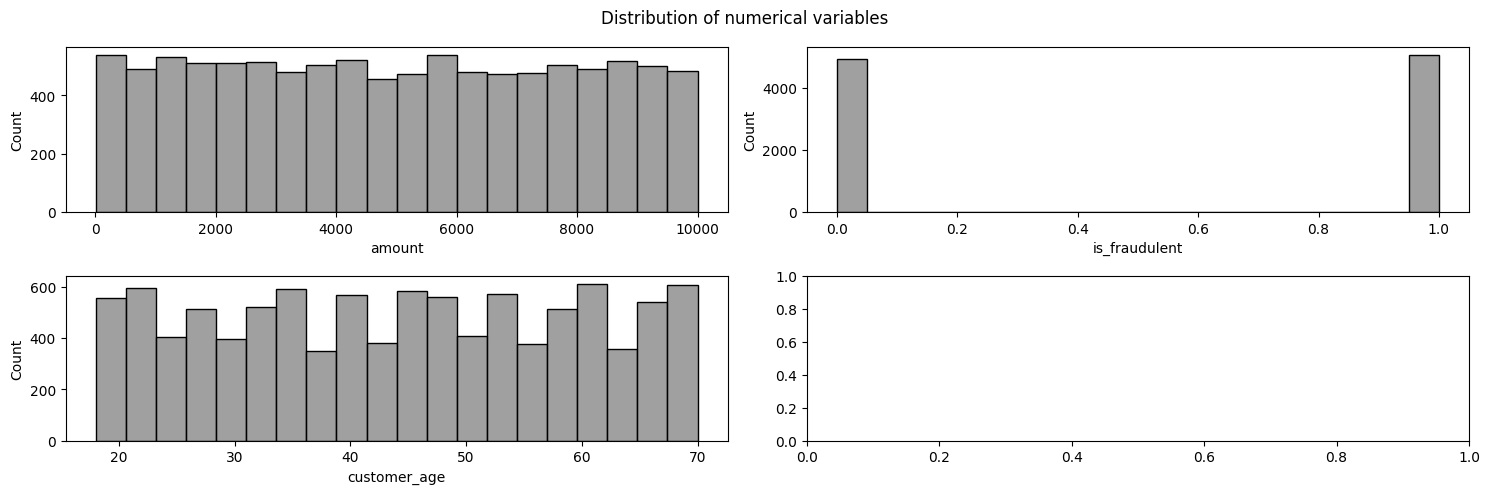

In [65]:
viz.plot_all_numerical()

Las distribuciones parecen bastante uniformes sin que podamos identificar patrones claros

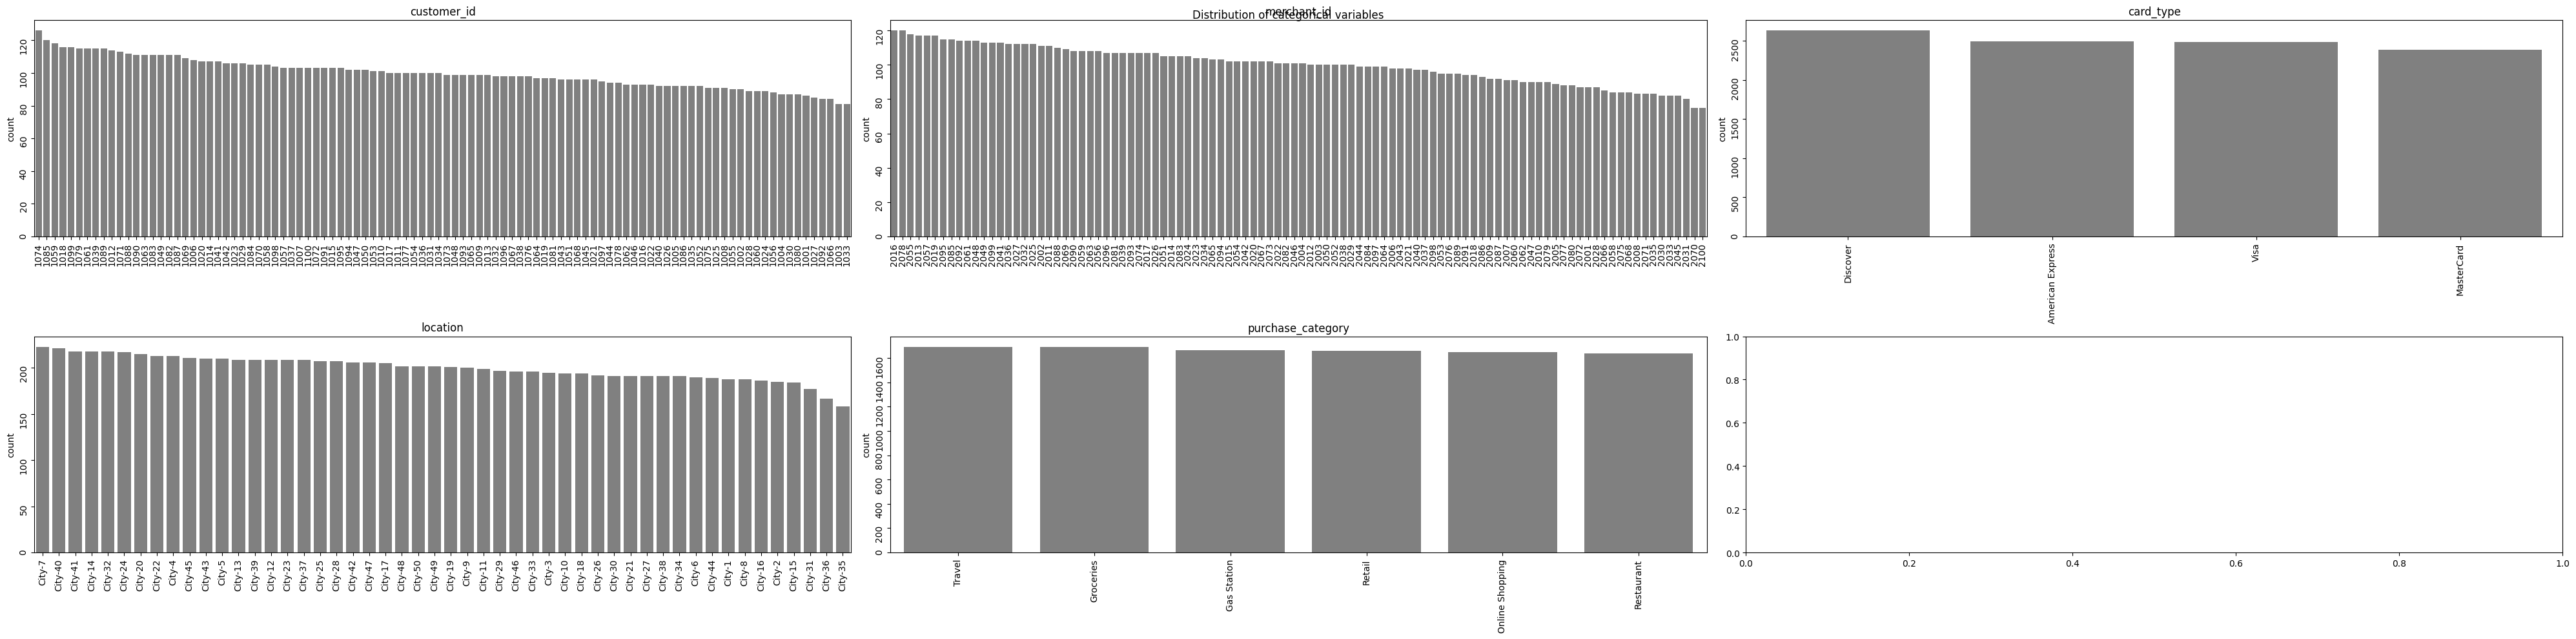

In [66]:
viz.plot_all_categorical()

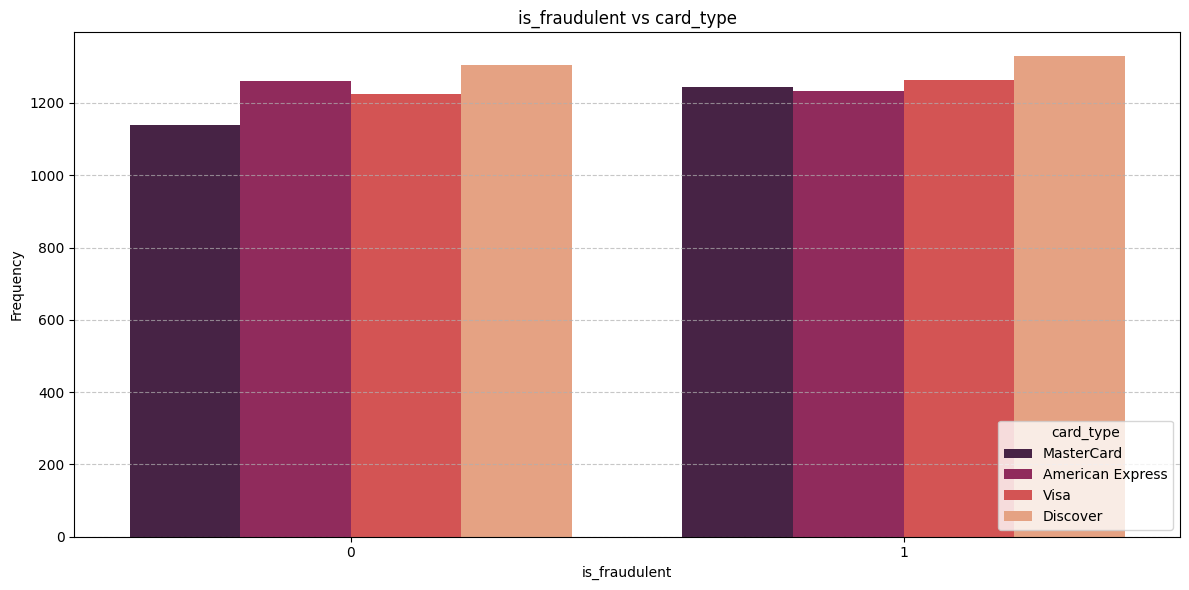

In [67]:
viz.plot_categorical_comparison('is_fraudulent', 'card_type')

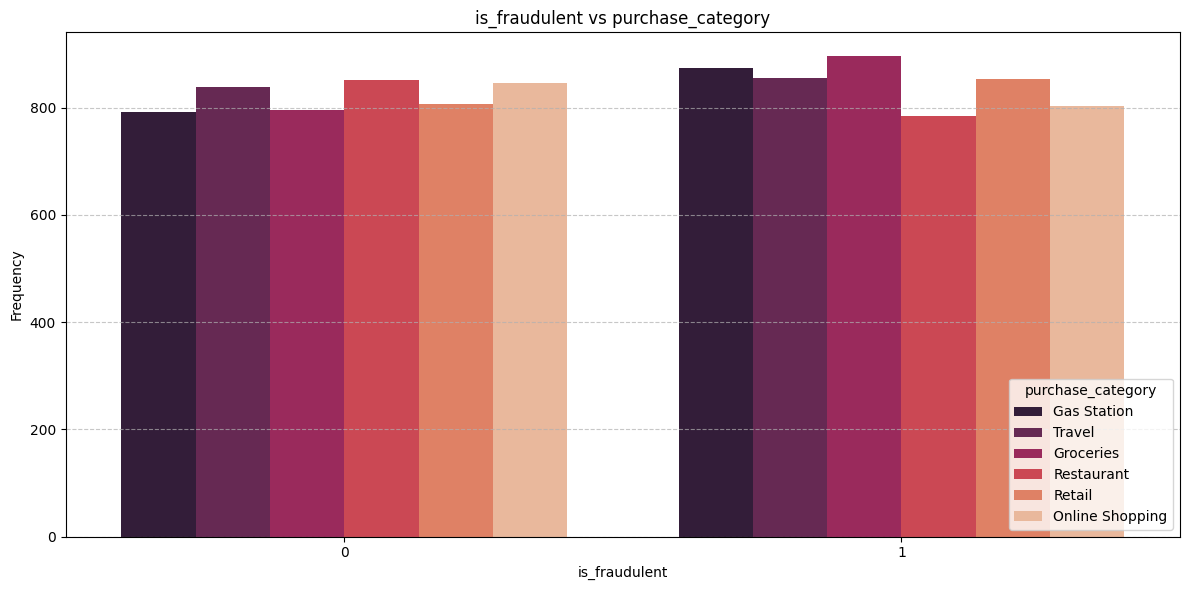

In [68]:
viz.plot_categorical_comparison('is_fraudulent', 'purchase_category')

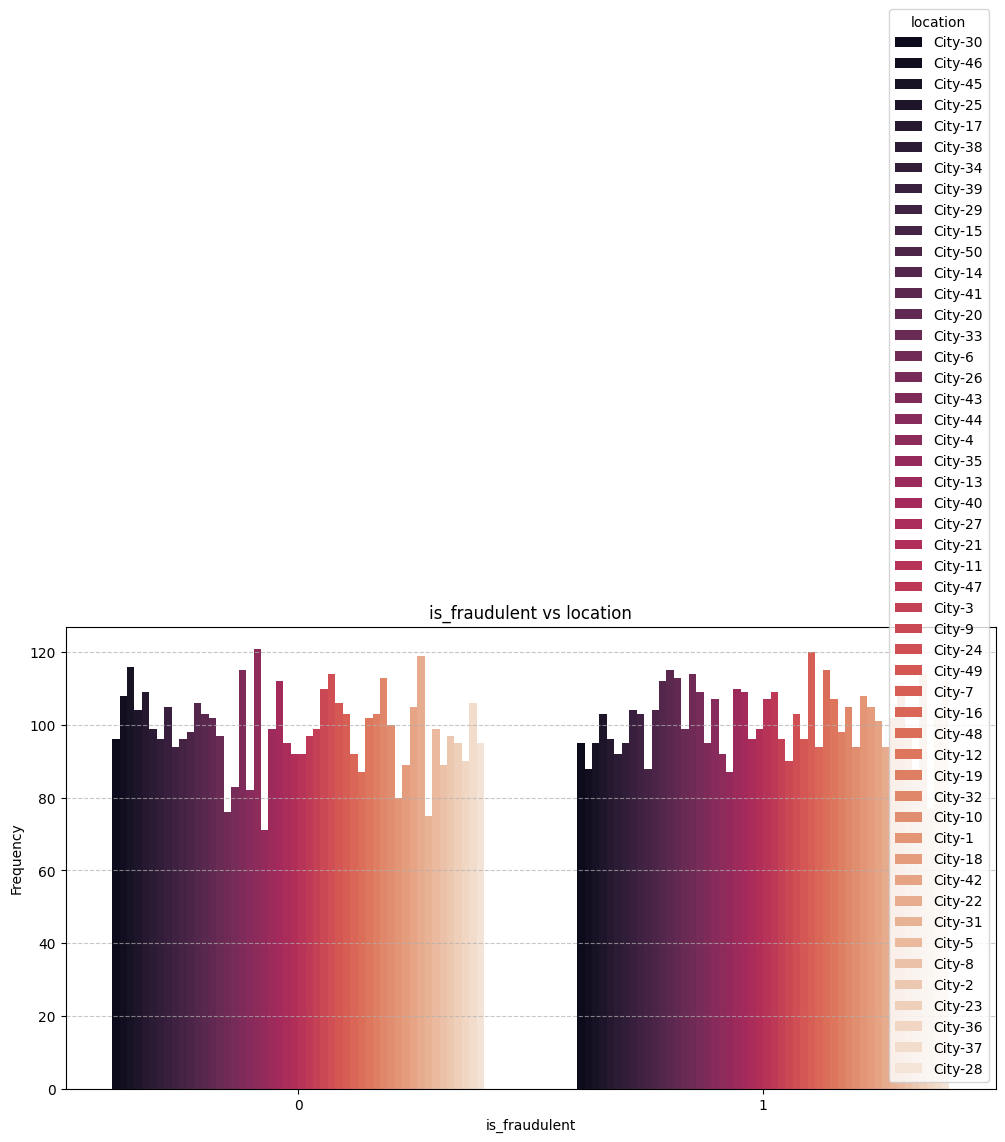

In [69]:
viz.plot_categorical_comparison('is_fraudulent', 'location')

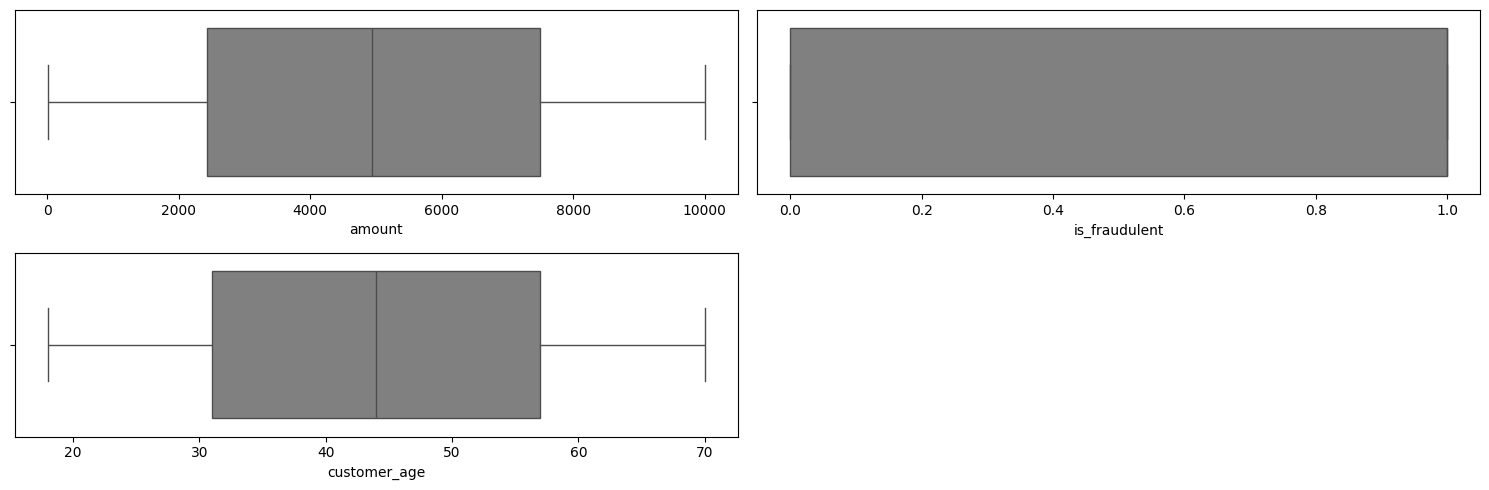

In [70]:
viz.outliers_detection()

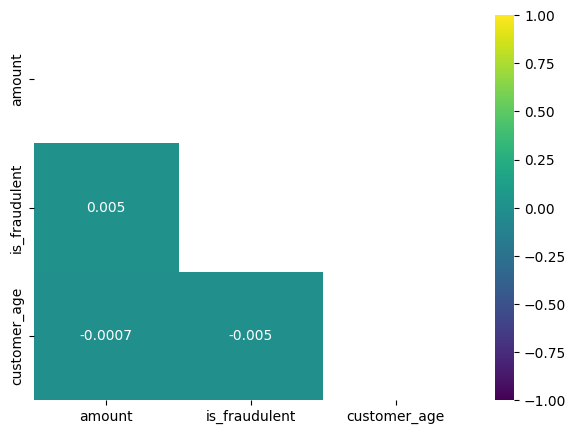

In [71]:
viz.correlation()

No hay nada de correlación

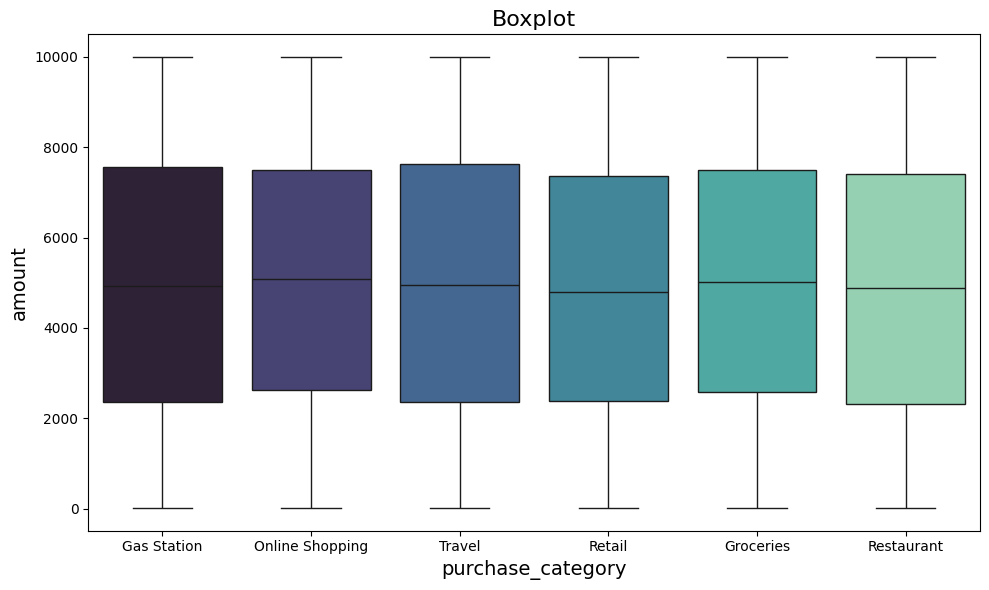

In [72]:
viz.grouped_boxplot('amount', 'purchase_category')

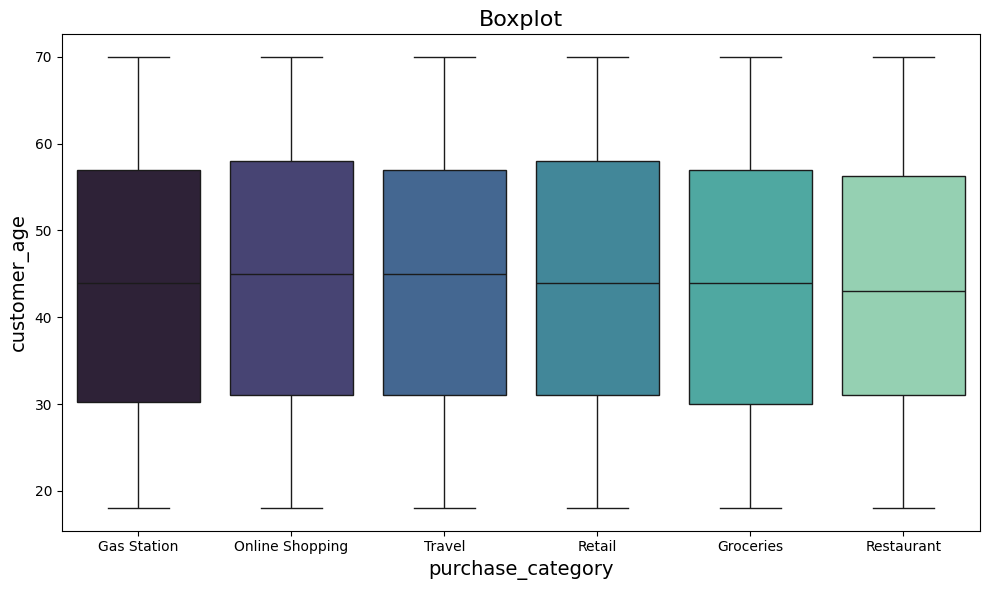

In [73]:
viz.grouped_boxplot('customer_age', 'purchase_category')

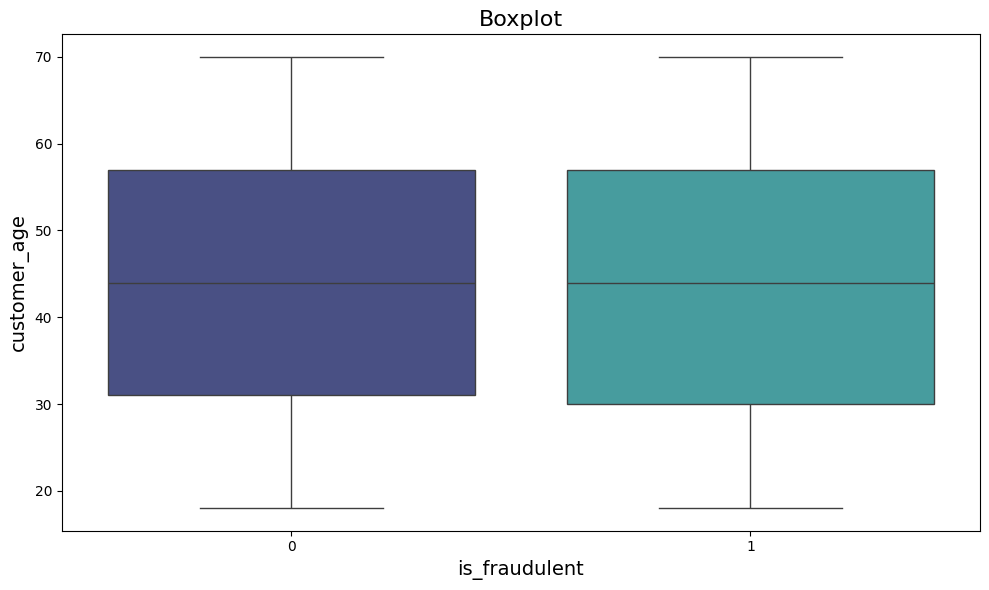

In [74]:
viz.grouped_boxplot('customer_age', 'is_fraudulent')